In [1]:
%pip install polars --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


get the list of types that are important to the region
- The Forge (10000002)
- Sinq Laison (10000032)
- Domain (10000043)
- Heimatar (10000030)

In [17]:
import requests
from pprint import pprint
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# region_ids = {"The Forge": 10000002}#,
            #   "Sinq Laison": 10000032}#,
            #   "Domain": 10000043,
            #   "Heimatar": 10000030}

systems_of_interest = {"Jita": 30000142, 
                       "Amarr": 30002187,
                       "Dodixie": 30002659,
                       "Rens": 30002510,
                       #"Hek": 30002053
                       }

In [4]:
df = pl.scan_parquet(source= "s3://market-data-dev-142571790518/processed/order_volumes/").collect()

In [5]:
df.sample(5)

duration,is_buy_order,issued,location_id,min_volume,order_id,price,range,system_id,type_id,volume_remain,volume_total,year,month,day,hour
i64,bool,str,i64,i64,i64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64
90,true,"""2025-04-25T21:49:17Z""",60003760,1,7025211351,8.5e7,"""region""",30000142,32793,1,1,2025,5,2,20
365,false,"""2025-04-21T20:12:19Z""",60004468,1,6381234409,20000.0,"""region""",30000195,21853,8333,8333,2025,5,2,20
90,false,"""2025-03-05T21:43:39Z""",60015041,1,6978776743,58.0,"""region""",30012505,226,40000,50000,2025,5,3,18
3,false,"""2025-05-02T09:55:19Z""",60005062,1,7044177284,24.0,"""region""",30002543,184,3000,3000,2025,5,2,20
90,true,"""2025-05-01T16:49:36Z""",60003760,1,7043717654,2000.0,"""station""",30000142,32858,20,20,2025,5,3,18


In [15]:
(df.filter(
    #pl.col("order_id") == 7009967995, 
    pl.col("system_id") == 30000142,
    pl.col("type_id") == 36,
    # pl.col("is_buy_order") == True
    )
    .group_by("order_id")
    .agg(pl.len().alias("count"),)
)

order_id,count
i64,u32
6996033305,2
6991768670,2
7040880310,2
7038877586,2
6939017498,2
…,…
7037565287,2
7017348877,2
7038804945,2


In [14]:
df.filter(pl.col("order_id") == 7044451318)

duration,is_buy_order,issued,location_id,min_volume,order_id,price,range,system_id,type_id,volume_remain,volume_total,year,month,day,hour
i64,bool,str,i64,i64,i64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64
90,true,"""2025-05-02T17:40:37Z""",60003760,1,7044451318,76.4,"""station""",30000142,36,17598763,17600000,2025,5,2,20
90,true,"""2025-05-03T15:58:53Z""",60003760,1,7044451318,76.49,"""station""",30000142,36,15870908,17600000,2025,5,3,18


# Sample for one type_id

In [42]:
df_short = df.filter(
    #pl.col("order_id") == 7009967995, 
    # pl.col("system_id") == 30000142,
    pl.col("type_id") == 36,
    pl.col("price") < 200,
    pl.col("price") > 10)

<Axes: xlabel='price', ylabel='volume_remain'>

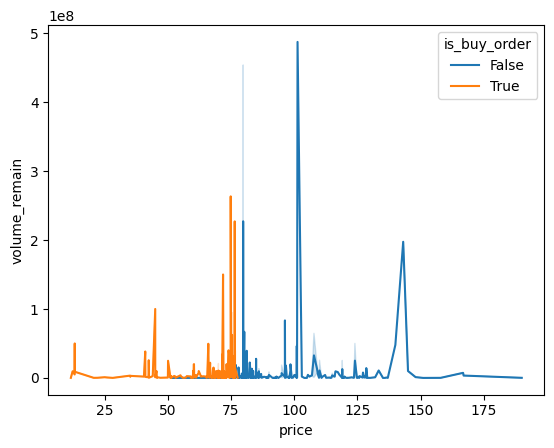

In [43]:
sns.lineplot(data=df_short,
    x="price",
    y="volume_remain", 
    hue="is_buy_order")

30000142


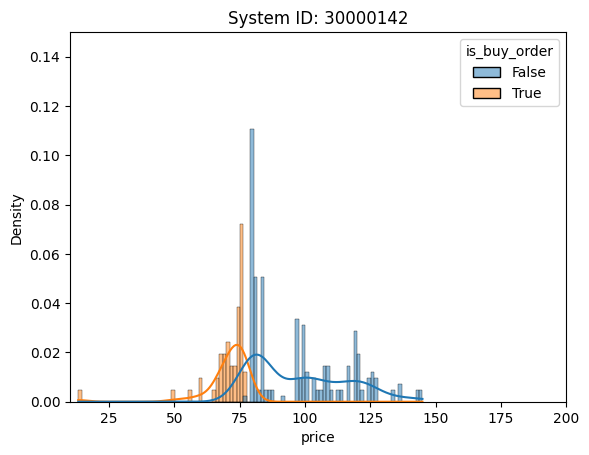

shape: (2, 3)
┌──────────────┬───────────┬───────────┐
│ is_buy_order ┆ min_price ┆ max_price │
│ ---          ┆ ---       ┆ ---       │
│ bool         ┆ f64       ┆ f64       │
╞══════════════╪═══════════╪═══════════╡
│ true         ┆ 13.15     ┆ 76.49     │
│ false        ┆ 76.49     ┆ 145.0     │
└──────────────┴───────────┴───────────┘
30002187


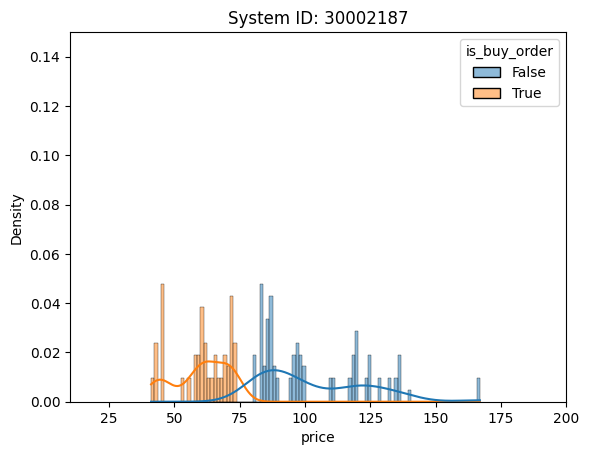

shape: (2, 3)
┌──────────────┬───────────┬───────────┐
│ is_buy_order ┆ min_price ┆ max_price │
│ ---          ┆ ---       ┆ ---       │
│ bool         ┆ f64       ┆ f64       │
╞══════════════╪═══════════╪═══════════╡
│ true         ┆ 41.05     ┆ 73.15     │
│ false        ┆ 80.91     ┆ 167.0     │
└──────────────┴───────────┴───────────┘
30002659


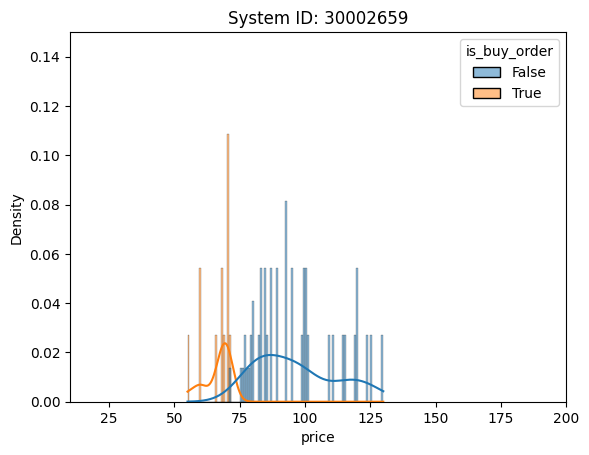

shape: (2, 3)
┌──────────────┬───────────┬───────────┐
│ is_buy_order ┆ min_price ┆ max_price │
│ ---          ┆ ---       ┆ ---       │
│ bool         ┆ f64       ┆ f64       │
╞══════════════╪═══════════╪═══════════╡
│ false        ┆ 71.01     ┆ 130.0     │
│ true         ┆ 55.0      ┆ 71.0      │
└──────────────┴───────────┴───────────┘
30002510


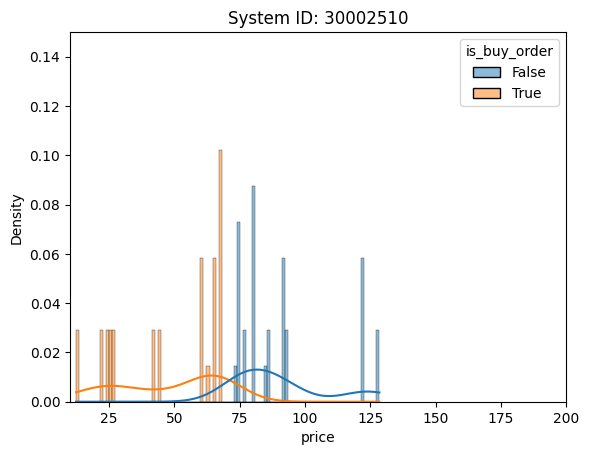

shape: (2, 3)
┌──────────────┬───────────┬───────────┐
│ is_buy_order ┆ min_price ┆ max_price │
│ ---          ┆ ---       ┆ ---       │
│ bool         ┆ f64       ┆ f64       │
╞══════════════╪═══════════╪═══════════╡
│ false        ┆ 73.0      ┆ 128.5     │
│ true         ┆ 12.31     ┆ 67.26     │
└──────────────┴───────────┴───────────┘


In [55]:
for s in systems_of_interest.values():
    print(s)
    plt.xlim(10, 200)
    plt.ylim(0, 0.15)
    sns.histplot(data = df_short.filter(pl.col("system_id") == s),
        x="price",
        bins=100,
        stat="density",
        kde=True,
        hue="is_buy_order",
    )
    plt.title(f"System ID: {s}")
    plt.show()

    print((df_short.filter(
    #pl.col("order_id") == 7009967995, 
    pl.col("system_id") == s)
    .group_by("is_buy_order")
    .agg(pl.min("price").alias("min_price"),
        pl.max("price").alias("max_price"),
        )
    ))